In [1]:
## self attempt at t-sne to visualize similar groups of glass
## dataset url:
## https://archive.ics.uci.edu/ml/datasets/Glass+Identification

In [40]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

#### Load data

In [33]:
orig = pd.read_csv('../Datasets/glass.data', header=None)

print(orig.shape)
orig.head(2)

(214, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [34]:
int_to_str = {1: 'building window 1', 2: 'building window 2',
              3: 'car window 1', 4: 'car window 2',
              5: 'glass containers', 6: 'tableware', 7: 'headlamps'}

orig.iloc[:, 10] = orig.iloc[:, 10].map(int_to_str)

orig.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building window 1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building window 1


In [35]:
x = orig.iloc[:, :-1]
y = orig.iloc[:, -1]

print(x.shape, y.shape)

(214, 10) (214,)


In [36]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x) 

C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 214 samples in 0.001s...
[t-SNE] Computed neighbors for 214 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 214 / 214
[t-SNE] Mean sigma: 11.127504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.491547
[t-SNE] KL divergence after 1000 iterations: 0.122358


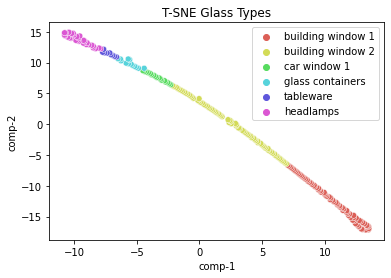

In [41]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", df.y.nunique()),
                data=df).set(title="T-SNE Glass Types") 
plt.show()